# Import Package

In [1]:
# Basic Imports 
import numpy as np
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

# Metrics 
from sklearn.metrics import mean_squared_error as  mse, mean_absolute_error as mae

# ML Models
import lightgbm as lgb
from lightgbm import LGBMRegressor 
import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# Model Tuning 
from bayes_opt import BayesianOptimization

# Feature Importance 
import shap

# Ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data_files/House Price_data/train.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
train.shape

(1460, 81)

In [6]:
train.info(verbose = True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [8]:
print('Feature      Number of NaN')
print(train.isnull().sum().sort_values(ascending=False).loc[lambda x : x!=0])

Feature      Number of NaN
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [9]:
test = pd.read_csv('../data_files/House Price_data/test.csv')

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [11]:
print('Feature      Number of NaN')
print(test.isnull().sum().sort_values(ascending=False).loc[lambda x : x!=0])

Feature      Number of NaN
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64


In [12]:
drop_columns = (train.isnull().sum().sort_values(ascending=False).loc[lambda x : x> .90*1460]).index.to_list()
drop_columns.append('Id')

train_Id = train['Id'].to_list()
test_Id = test['Id'].to_list()

print('Feature      Number of NaN')
print(test.isnull().sum().sort_values(ascending=False).loc[lambda x : x>.90*1460])

Feature      Number of NaN
PoolQC         1456
MiscFeature    1408
Alley          1352
dtype: int64


In [13]:
train_clean = train.drop(drop_columns,axis=1,errors='ignore')
test_clean = test.drop(drop_columns,axis=1,errors='ignore')

train_10_percent_missing_features = train_clean.isnull().sum().sort_values(ascending=False).loc[lambda x :(x < .10 * 1460)].index.to_list()
# 离散型
train_10_percent_missing_features_cat = train_clean[train_10_percent_missing_features].select_dtypes('object').columns.to_list()
# 连续型
train_10_percent_missing_features_num = train_clean[train_10_percent_missing_features].select_dtypes('number').columns.to_list()

# 众数填充
train_clean[train_10_percent_missing_features_cat] = train_clean[train_10_percent_missing_features_cat].fillna(train_clean[train_10_percent_missing_features_cat].mode().iloc[0])
# 中位数填充
train_clean[train_10_percent_missing_features_num] = train_clean[train_10_percent_missing_features_num].fillna(train_clean[train_10_percent_missing_features_num].median().iloc[0])

test_10_percent_missing_features = test_clean.isnull().sum().sort_values(ascending=False).loc[lambda x : (x<.10*1460)  & (x != 0)].index.to_list()
test_10_percent_missing_features_cat = test_clean[test_10_percent_missing_features].select_dtypes('object').columns.to_list()
test_10_percent_missing_features_num = test_clean[test_10_percent_missing_features].select_dtypes('number').columns.to_list()

test_clean[test_10_percent_missing_features_cat] = test_clean[test_10_percent_missing_features_cat].fillna(test_clean[test_10_percent_missing_features_cat].mode().iloc[0])
test_clean[test_10_percent_missing_features_num] = test_clean[test_10_percent_missing_features_num].fillna(test_clean[test_10_percent_missing_features_num].median().iloc[0])

train_clean["LotFrontage"] = train_clean["LotFrontage"].fillna(train_clean["LotFrontage"].median())
test_clean["LotFrontage"] = test_clean["LotFrontage"].fillna(test_clean["LotFrontage"].median())

print("train_clean")
print('Feature      Number of NaN')
print(train_clean.isnull().sum().sort_values(ascending=False).loc[lambda x : x!=0])

print('\n')

print("test_clean")
print('Feature      Number of NaN')
print(test_clean.isnull().sum().sort_values(ascending=False).loc[lambda x : x!=0])


train_clean
Feature      Number of NaN
Fence          1179
FireplaceQu     690
dtype: int64


test_clean
Feature      Number of NaN
Fence          1169
FireplaceQu     730
dtype: int64


In [14]:
y = train_clean['SalePrice']
X = train_clean.drop('SalePrice',axis=1)

X_index = X.index.to_list()

X_total = X.append(test_clean,ignore_index = True)
display(X_total.info())

X_test_clean_index = np.setdiff1d(X_total.index.to_list(),X_index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

None

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns=None):
        self.columns = columns
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = output[col].fillna('NaN')
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
# store the catagorical features names as a list      
cat_features = X_total.select_dtypes(['object']).columns.to_list()

# use MultiColumnLabelEncoder to apply LabelEncoding on cat_features 
# uses NaN as a value , no imputation will be used for missing data
X_total_encoded = MultiColumnLabelEncoder(columns = cat_features).fit_transform(X_total)

In [21]:
##% Split X_total_encoded 
X_train_clean_encoded = X_total_encoded.iloc[X_index, :]
X_test_clean_encoded = X_total_encoded.iloc[X_test_clean_index, :].reset_index(drop = True) 
X_train_clean_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
Mas

In [23]:
##% Before and After LabelEncoding for train.csv 
display(X.head())
display(X_train_clean_encoded.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,4,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,4,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,4,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,4,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,4,0,12,2008,8,4


In [24]:
##% Before and After LabelEncoding for test.csv 
display(test_clean.head())
display(X_test_clean_encoded.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,0,1,2010,WD,Normal


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,1,12,13,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,1,4,1,4,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,3,1,1961.0,2,1.0,730.0,4,4,2,140,0,0,0,120,0,2,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,1,13,14,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,1,4,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,3,1,1958.0,2,1.0,312.0,4,4,2,393,36,0,0,0,0,4,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,5,5,5,1997,1998,1,1,12,13,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,1,2,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,5,1,1997.0,0,2.0,482.0,4,4,2,212,34,0,0,0,0,2,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,5,6,6,1998,1998,1,1,12,13,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,1,0,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,4,4,2,360,36,0,0,0,0,4,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,1,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,1,0,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,3,1,1992.0,1,2.0,506.0,4,4,2,0,82,0,0,144,0,4,0,1,2010,8,4


In [25]:
# Create test and train set 80-20
#%%  train-test split using a 80-20 split
train_X, valid_X, train_y, valid_y = train_test_split(X_train_clean_encoded, y, test_size=0.2, shuffle = True, random_state=0)

train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 76 columns):
MSSubClass       1168 non-null int64
MSZoning         1168 non-null int64
LotFrontage      1168 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null int64
LotShape         1168 non-null int64
LandContour      1168 non-null int64
Utilities        1168 non-null int64
LotConfig        1168 non-null int64
LandSlope        1168 non-null int64
Neighborhood     1168 non-null int64
Condition1       1168 non-null int64
Condition2       1168 non-null int64
BldgType         1168 non-null int64
HouseStyle       1168 non-null int64
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null int64
RoofMatl         1168 non-null int64
Exterior1st      1168 non-null int64
Exterior2nd      1168 non-null int64
MasVnrType       1168 non-null int64
Ma

# Initial Models
We can not apply different machine learning algorthims to test which model perform better on this dataset. I've listed below various machine learning techniques applied in this section.

*   RandomForest
*   Support Vector Machine
*   XGBoost
*   LightGBM



In [26]:
##% evaluateRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mse(true,predicted,squared = True)
    MAE = mae(true,predicted)
    RMSE = mse(true,predicted,squared = False)
    LogRMSE = mse(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)

In [27]:
##% Plot True vs predicted values. Useful for continuous y 
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()

In [28]:
##% Initial Models
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import svm
# import lightgbm as lgb
# import xgboost as xg 

RFReg = RandomForestRegressor(random_state = 0).fit(train_X, train_y)
SVM = svm.SVR().fit(train_X, train_y) 
XGReg = xg.XGBRegressor(objective ='reg:squarederror', seed = 0,verbosity=0).fit(train_X,train_y) 
LGBMReg = lgb.LGBMRegressor(random_state=0).fit(train_X,train_y)

In [29]:
##% Model Metrics
print("Random Forest Regressor") 
predicted_train_y = RFReg.predict(train_X)
evaluateRegressor(train_y,predicted_train_y,"    Training Set")
predicted_valid_y = RFReg.predict(valid_X)
evaluateRegressor(valid_y,predicted_valid_y,"    Test Set")
print("\n")
    
print("Support Vector Machine") 
predicted_train_y = SVM.predict(train_X)
evaluateRegressor(train_y,predicted_train_y,"    Training Set")
predicted_valid_y = SVM.predict(valid_X)
evaluateRegressor(valid_y,predicted_valid_y,"    Test Set")
print("\n")


print("XGBoost Regressor") 
predicted_train_y = XGReg.predict(train_X)
evaluateRegressor(train_y,predicted_train_y,"    Training Set")
predicted_valid_y = XGReg.predict(valid_X)
evaluateRegressor(valid_y,predicted_valid_y,"    Test Set")
print("\n")

print("LightGBM Regressor") 
predicted_train_y = LGBMReg.predict(train_X)
evaluateRegressor(train_y,predicted_train_y,"    Training Set")
predicted_valid_y = LGBMReg.predict(valid_X)
evaluateRegressor(valid_y,predicted_valid_y,"    Test Set")

Random Forest Regressor
    Training Set
MSE: 124458317.90507004
MAE: 6553.9395547945205
RMSE: 11156.088826513978
LogRMSE: 0.06263755839008012
    Test Set
MSE: 1069955990.5817266
MAE: 17148.310719178084
RMSE: 32710.181757087907
LogRMSE: 0.1387003405605433


Support Vector Machine
    Training Set
MSE: 6472139002.468355
MAE: 55516.23203243733
RMSE: 80449.60535930774
LogRMSE: 0.4023290326424375
    Test Set
MSE: 7241308930.447164
MAE: 55542.95134930656
RMSE: 85095.88080775217
LogRMSE: 0.38983624335105826


XGBoost Regressor
    Training Set
MSE: 1146598.1193553323
MAE: 733.3596325181935
RMSE: 1070.7932196999252
LogRMSE: 0.00719356591327356
    Test Set
MSE: 1033421355.0116786
MAE: 17563.705586472603
RMSE: 32146.871620916376
LogRMSE: 0.13606965265867998


LightGBM Regressor
    Training Set
MSE: 126288500.57971074
MAE: 5013.819061606673
RMSE: 11237.815649836526
LogRMSE: 0.04809269887204899
    Test Set
MSE: 999264659.8651305
MAE: 16598.163380637183
RMSE: 31611.147715088275
LogRMSE: 0.135

In [30]:
##% parameter tuning for lightgbm 
# store the catagorical features names as a list      
cat_features = X_train_clean_encoded.select_dtypes(['object']).columns.to_list()

# Create the LightGBM data containers
# Make sure that cat_features are used
train_data=lgb.Dataset(train_X,label=train_y, categorical_feature = cat_features,free_raw_data=False)
valid_data=lgb.Dataset(valid_X,label=valid_y, categorical_feature = cat_features,free_raw_data=False)

In [31]:
# https://medium.com/analytics-vidhya/hyperparameters-optimization-for-lightgbm-catboost-and-xgboost-regressors-using-bayesian-6e7c495947a9
# from lightgbm import LGBMRegressor 
# from bayes_opt import BayesianOptimization
def search_best_param(X,y,cat_features):
    
    trainXY = lgb.Dataset(data=X, label=y,categorical_feature = cat_features,free_raw_data=False)
    # define the lightGBM cross validation
    def lightGBM_CV(max_depth, num_leaves, n_estimators, learning_rate, subsample, colsample_bytree, 
                lambda_l1, lambda_l2, min_child_weight):        
        params = {'boosting_type': 'gbdt', 'objective': 'regression', 'metric':'rmse', 'verbose': -1,
                  'early_stopping_round':100}
        
        params['max_depth'] = int(round(max_depth))
        params["num_leaves"] = int(round(num_leaves))
        params["n_estimators"] = int(round(n_estimators))
        params['learning_rate'] = learning_rate
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_child_weight'] = min_child_weight
    
        score = lgb.cv(params, trainXY, nfold=5, seed=1, stratified=False, verbose_eval =False, metrics=['rmse'])

        return -np.min(score['rmse-mean']) # min or max can change best_param
    
    # use bayesian optimization to search for the best hyper-parameter combination
    lightGBM_Bo = BayesianOptimization(lightGBM_CV, 
                                       {
                                          'max_depth': (5, 50),
                                          'num_leaves': (20, 100),
                                          'n_estimators': (50, 1000),
                                          'learning_rate': (0.01, 0.3),
                                          'subsample': (0.7, 0.8),
                                          'colsample_bytree' :(0.5, 0.99),
                                          'lambda_l1': (0, 5),
                                          'lambda_l2': (0, 3),
                                          'min_child_weight': (2, 50) 
                                      },
                                       random_state = 1,
                                       verbose = 0
                                      )
    np.random.seed(1)
    
    lightGBM_Bo.maximize(init_points=5, n_iter=25) 
    
    params_set = lightGBM_Bo.max['params']

    # get the params of the maximum target     
    max_target = -np.inf
    for i in lightGBM_Bo.res: # loop thru all the residuals 
        if i['target'] > max_target:
            params_set = i['params']
            max_target = i['target']
    
    params_set.update({'verbose': -1})
    params_set.update({'metric': 'rmse'})
    params_set.update({'boosting_type': 'gbdt'})
    params_set.update({'objective': 'regression'})
    
    params_set['max_depth'] = int(round(params_set['max_depth']))
    params_set['num_leaves'] = int(round(params_set['num_leaves']))
    params_set['n_estimators'] = int(round(params_set['n_estimators']))
    params_set['seed'] = 1 #set seed
    
    return params_set

best_params = search_best_param(train_X,train_y,cat_features)

In [32]:
# Print best_params
for key, value in best_params.items():
    print(key, ' : ', value)

colsample_bytree  :  0.5989221937214203
lambda_l1  :  2.8997706079402836
lambda_l2  :  0.2975532330441406
learning_rate  :  0.08836383670131573
max_depth  :  22
min_child_weight  :  13.233710226135237
n_estimators  :  291
num_leaves  :  81
subsample  :  0.7441667823186404
verbose  :  -1
metric  :  rmse
boosting_type  :  gbdt
objective  :  regression
seed  :  1


In [34]:
# Train lgbm_best using the best params found from Bayesian Optimization
lgbm_best = lgb.train(best_params,
                 train_data,
                 num_boost_round = 2500,
                 valid_sets = valid_data,
                 early_stopping_rounds = 200,
                 verbose_eval = 100
                 )

Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 31660.1
[200]	valid_0's rmse: 30226.8
Did not meet early stopping. Best iteration is:
[291]	valid_0's rmse: 29334.6


LightGBM Regressor Tuned
    Training Set
MSE: 34100573.96234323
MAE: 1628.1406485724908
RMSE: 5839.569672702196
LogRMSE: 0.022138848284310925


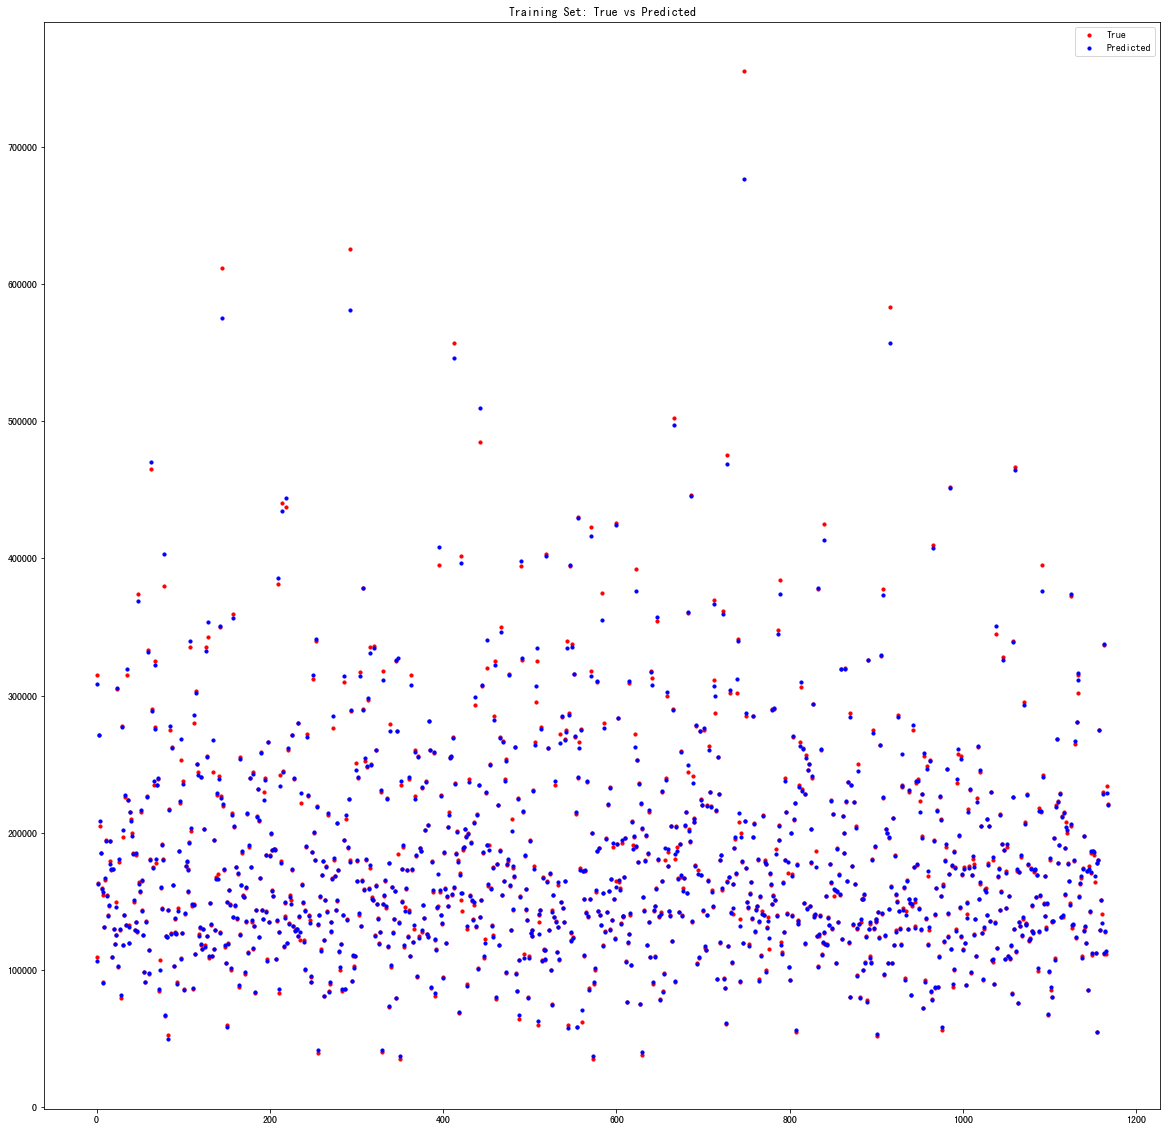

In [35]:
print("LightGBM Regressor Tuned") 
predicted_train_y = lgbm_best.predict(train_X)
evaluateRegressor(train_y,predicted_train_y,"    Training Set")
PlotPrediction(train_y,predicted_train_y,"Training Set: ")

    Test Set
MSE: 860519761.7932965
MAE: 16505.55157518033
RMSE: 29334.61712368676
LogRMSE: 0.13311820156427817


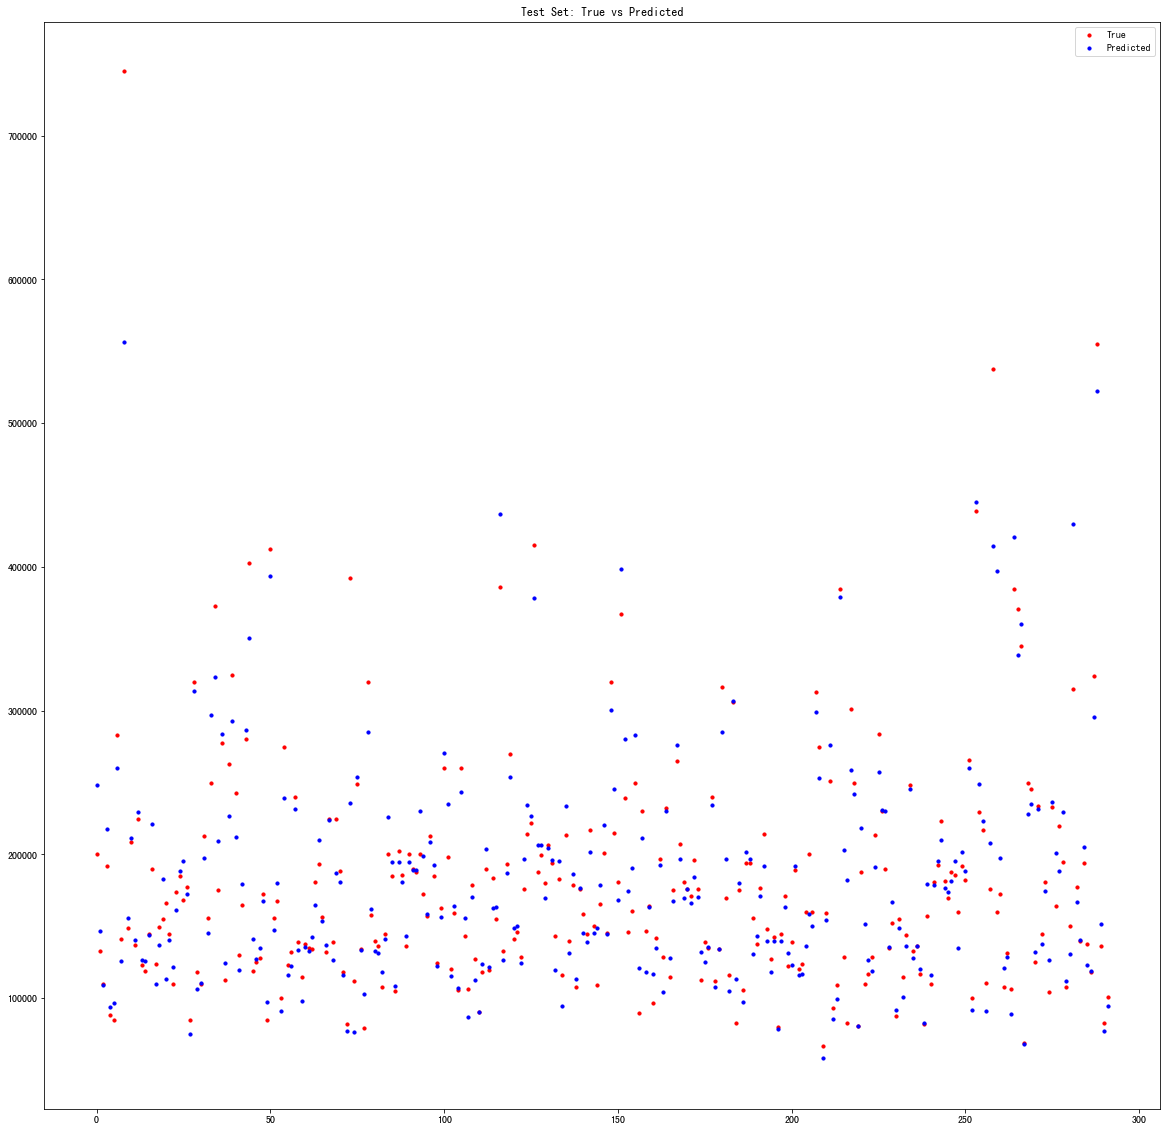

In [36]:
predicted_valid_y = lgbm_best.predict(valid_X)
evaluateRegressor(valid_y,predicted_valid_y,"    Test Set")
PlotPrediction(valid_y,predicted_valid_y,"Test Set: ")

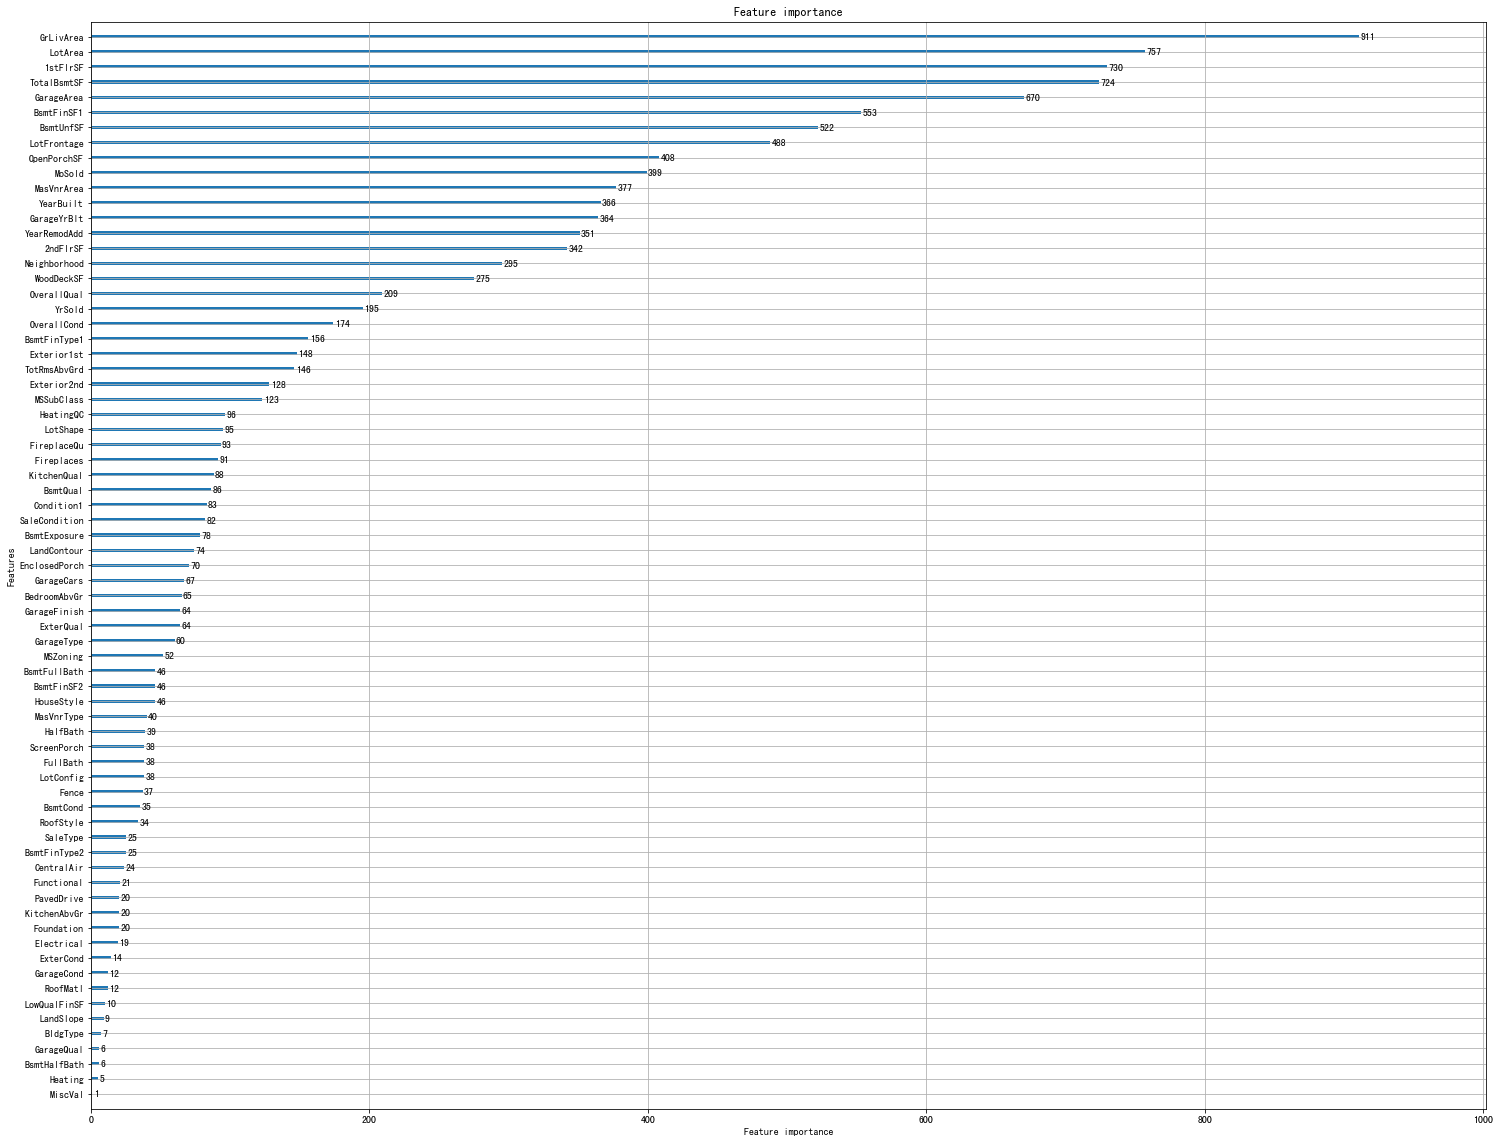

In [37]:
##% Feature Importance 
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
lgb.plot_importance(lgbm_best,figsize=(25,20))

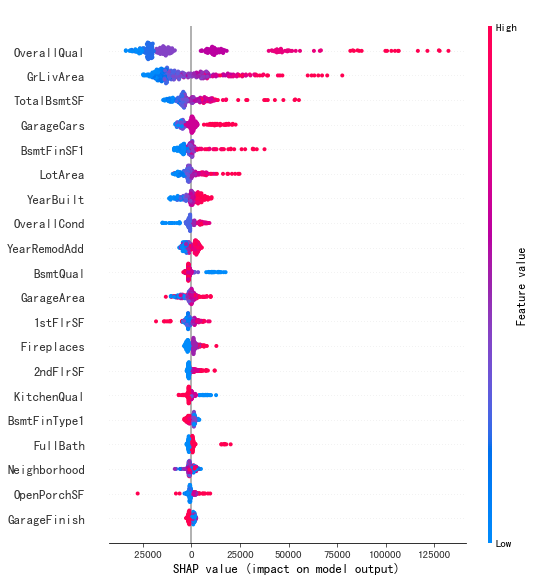

In [38]:
##% Feature Importance using shap package 
# import shap
lgbm_best.params['objective'] = 'regression'
shap_values = shap.TreeExplainer(lgbm_best).shap_values(valid_X)
shap.summary_plot(shap_values, valid_X)

In [40]:
# Cross Validation with LightGBM

def K_Fold_LightGBM(X_train, y_train , cat_features, num_folds = 3):
    num = 0
    models = []
    folds = KFold(n_splits=num_folds, shuffle=True, random_state=0)

        # 5 times 
    for n_fold, (train_idx, valid_idx) in enumerate (folds.split(X_train, y_train)):
        print(f"     model{num}")
        train_X, train_y = X_train.iloc[train_idx], y_train.iloc[train_idx]
        valid_X, valid_y = X_train.iloc[valid_idx], y_train.iloc[valid_idx]
        
        train_data=lgb.Dataset(train_X,label=train_y, categorical_feature = cat_features,free_raw_data=False)
        valid_data=lgb.Dataset(valid_X,label=valid_y, categorical_feature = cat_features,free_raw_data=False)
        
        params_set = search_best_param(train_X,train_y,cat_features)

        CV_LGBM = lgb.train(params_set,
                            train_data,
                            num_boost_round = 2500,
                            valid_sets = valid_data,
                            early_stopping_rounds = 200,
                            verbose_eval = 100
                           )
        
        # increase early_stopping_rounds can lead to overfitting 
        models.append(CV_LGBM)
        
        print("Train set logRMSE:", mse(np.log(train_y),np.log(models[num].predict(train_X)),squared = False))
        print(" Test set logRMSE:", mse(np.log(valid_y),np.log(models[num].predict(valid_X)),squared = False))
        print("\n")
        num = num + 1
        
    return models

lgbm_models = K_Fold_LightGBM(X_train_clean_encoded,y,cat_features,5)

     model0
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 30773.6
[200]	valid_0's rmse: 29447.6
Did not meet early stopping. Best iteration is:
[223]	valid_0's rmse: 29191.8
Train set logRMSE: 0.03606396858542673
 Test set logRMSE: 0.1295861111747427


     model1
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 22539.7
[200]	valid_0's rmse: 23456.9
Early stopping, best iteration is:
[72]	valid_0's rmse: 22186.1
Train set logRMSE: 0.07272460908954825
 Test set logRMSE: 0.1153392995712747


     model2
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 34014.7
[200]	valid_0's rmse: 33404
[300]	valid_0's rmse: 33561.3
Early stopping, best iteration is:
[172]	valid_0's rmse: 33305
Train set logRMSE: 0.08913521435095606
 Test set logRMSE: 0.1729437758430952


     model3
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 28147
[200]	valid_0's rmse: 2727

In [ ]:
# Predict y_prds using models from cross validation 
def predict_cv(models_cv,X):
    y_preds = np.zeros(shape = X.shape[0])
    for model in models_cv:
        y_preds += model.predict(X)
        
    return y_preds/len(models_cv)

# evalute model using the entire dataset from Train.csv
evaluateRegressor(y,predict_cv(lgbm_models,X_train_clean_encoded),"Train.csv ")
PlotPrediction(y,predict_cv(lgbm_models,X_train_clean_encoded),"Train.csv: ")

In [ ]:
predictLGBM = lgbm_best.predict(X_test_clean_encoded)
submissionLGBM = pd.DataFrame({'Id':test_Id,'SalePrice':predictLGBM})
display(submissionLGBM.head())

predictLGBM_CV = predict_cv(lgbm_models,X_test_clean_encoded)
submissionLGBM_CV = pd.DataFrame({'Id':test_Id,'SalePrice':predictLGBM_CV})
display(submissionLGBM_CV.head())

In [ ]:
##% Submit Predictions 
submissionLGBM.to_csv('submissionLGBM4.csv',index=False)
submissionLGBM_CV.to_csv('submissionLGBM_CV4.csv',index=False)